C:\Users\chris\AppData\Local\Temp\ipykernel_13116\235549666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=[1, 0], y=[0.3, 0.7], palette="Blues_d")


Text(0.5, 1.0, 'PMF of the Bernoulli distribution (θ=0.3)')

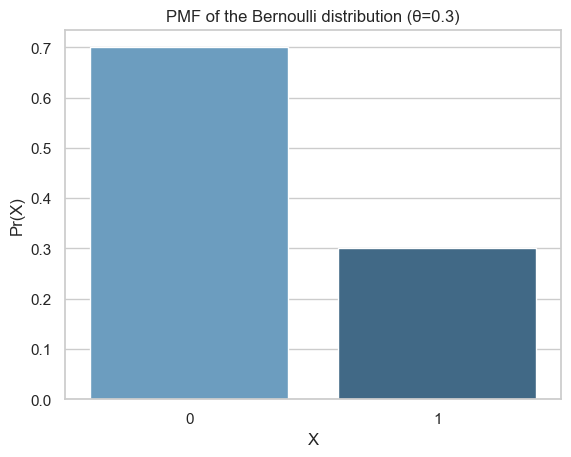

In [7]:
# This File creates Visualizations for Probabiliy Mass Functions (PMFs)
# Probabiliy Distributions include Bernouli, Binomial and Trinomial Distributions

import seaborn as sns

sns.set_theme(style="whitegrid")
ax=sns.barplot(x=[1, 0], y=[0.3, 0.7], palette="Blues_d")
ax.set_ylabel('Pr(X)')
ax.set_xlabel('X')
ax.set_title('PMF of the Bernoulli distribution (θ=0.3)')

C:\Users\chris\AppData\Local\Temp\ipykernel_13116\3184873841.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=np.arange(21), y=probs, palette="Blues_d")


Text(0.5, 1.0, 'PMF of the Binomial distribution (n=20;θ=0.3)')

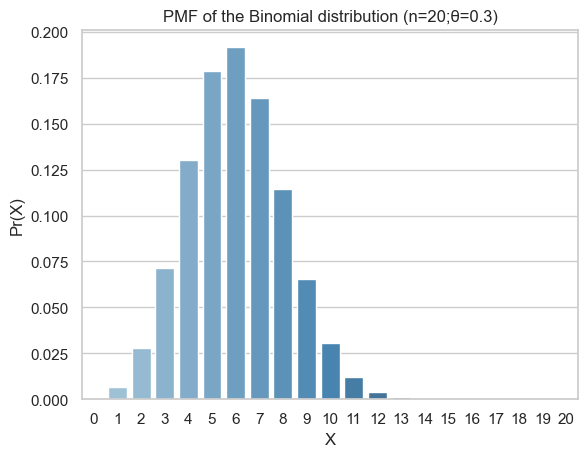

In [2]:
import numpy as np
import seaborn as sns
from scipy.stats import binom

n=20
p=0.3
probs=np.zeros(21)
for k in range(21):
    probs[k] = binom.pmf(k, n, p)

sns.set_theme(style="whitegrid")
ax=sns.barplot(x=np.arange(21), y=probs, palette="Blues_d")
ax.set_ylabel('Pr(X)')
ax.set_xlabel('X')
ax.set_title('PMF of the Binomial distribution (n=20;θ=0.3)')

Text(0.5, 0, 'Pr(X1,X2,X3)')

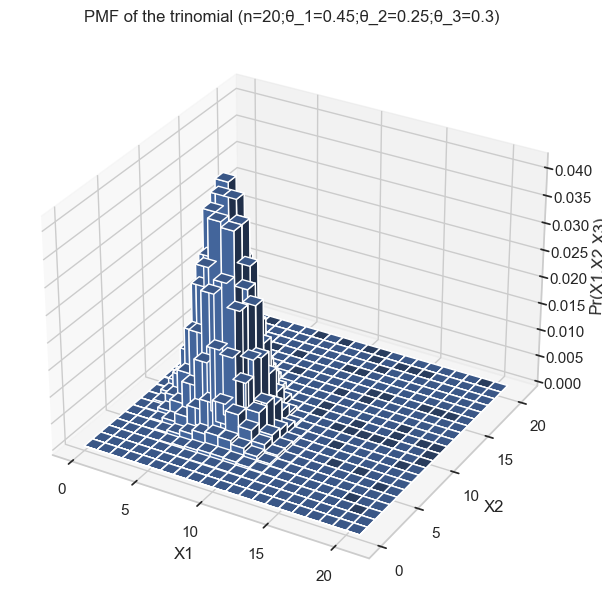

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multinomial


n=20
p=[0.45, 0.25, 0.3]
probs=np.zeros((n+1, n+1))
for n1 in range(n+1):
    for n2 in range(n+1):
        x = [n1, n2, n-n1-n2]
        probs[n1, n2] = multinomial.pmf(x, n, p)


# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(121, projection='3d')

# fake data
_x = range(n+1)
_y = range(n+1)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = probs.ravel()
bottom = np.zeros_like(top)
width = depth = 1
# colors = 

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('PMF of the trinomial (n=20;θ_1=0.45;θ_2=0.25;θ_3=0.3)')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Pr(X1,X2,X3)')

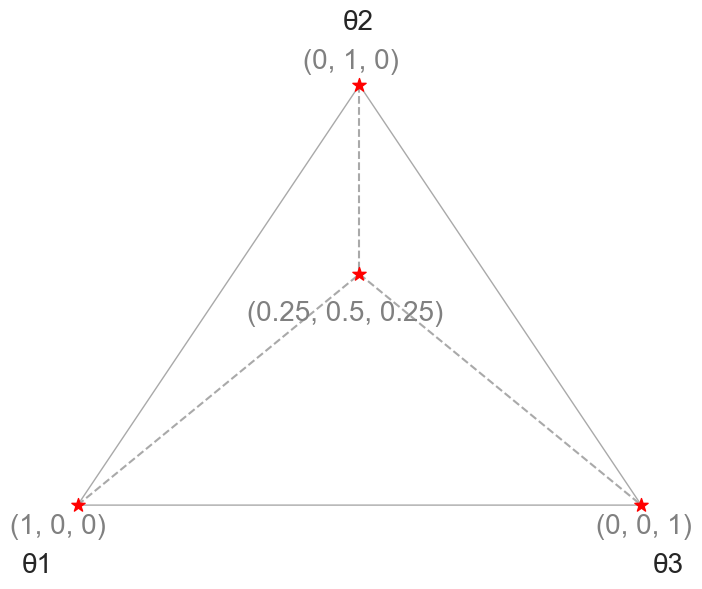

In [5]:
import matplotlib.tri as tri
import matplotlib.lines as lines


corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))


def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)


def plot_simplex():
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=0)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    ax.triplot(trimesh, linewidth=1, color='darkgray')
    ax.text(-0.1, -0.14, 'θ1', size=20)
    ax.text(0.47, 0.98, 'θ2', size=20)
    ax.text(1.02, -0.14, 'θ3', size=20)
    
    coef = 0.55
    
    l1 = lines.Line2D([0, 0.5], [0, ((0.75**0.5)*coef)], linestyle='--', color='darkgray')
    ax.add_line(l1)
    
    l2 = lines.Line2D([0.5, 0.5], [0.75**0.5, ((0.75**0.5)*coef)], linestyle='--', color='darkgray')
    ax.add_line(l2)
    
    l3 = lines.Line2D([0.5, 1], [((0.75**0.5)*coef), 0], linestyle='--', color='darkgray')
    ax.add_line(l3)
    
    ax.scatter([0.5], [((0.75**0.5)*coef)], marker='*', s=100, color='red', zorder=100)
    ax.text(0.3, 0.38, '(0.25, 0.5, 0.25)', size=20, zorder=100, color='gray')
    
    ax.scatter([0], [0], marker='*', s=100, color='red', zorder=100)
    ax.text(-0.12, -0.06, '(1, 0, 0)', size=20, zorder=100, color='gray')

    ax.scatter([0.5], [0.75**0.5], marker='*', s=100, color='red', zorder=100)
    ax.text(0.4, 0.9, '(0, 1, 0)', size=20, zorder=100, color='gray')

    ax.scatter([1], [0], marker='*', s=100, color='red', zorder=100)
    ax.text(0.92, -0.06, '(0, 0, 1)', size=20, zorder=100, color='gray')
    
    return trimesh

sns.set_theme(style="white")
plot_simplex()

C:\Users\chris\AppData\Local\Temp\ipykernel_13116\877050727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=[1, 0], y=[0.3, 0.7], palette="Blues_d")
C:\Users\chris\AppData\Local\Temp\ipykernel_13116\877050727.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=np.arange(21), y=probs, palette="Blues_d")


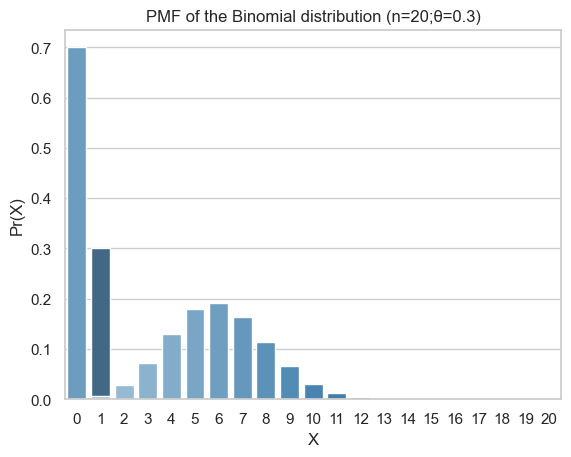

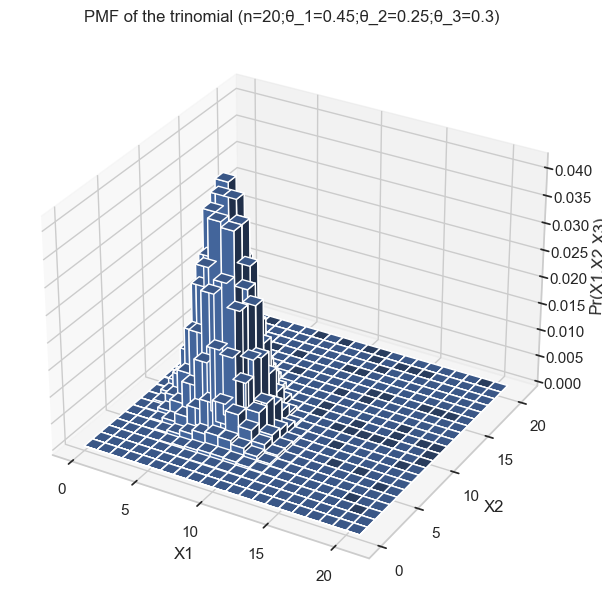

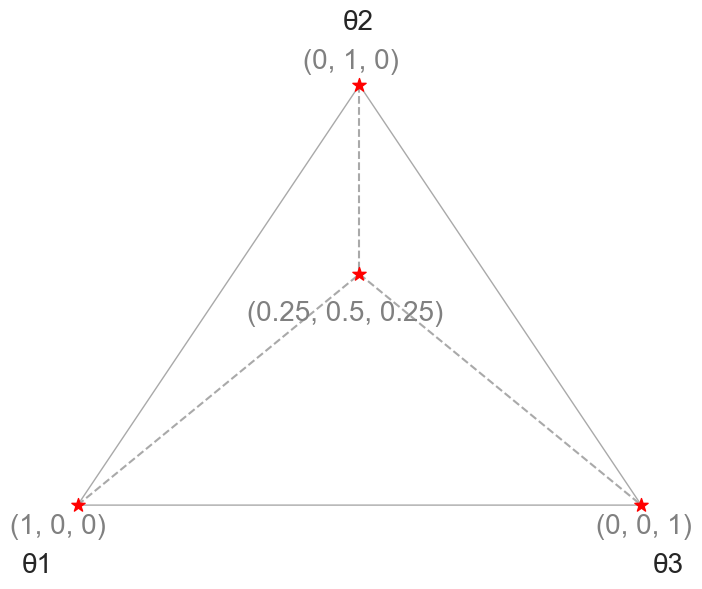

In [6]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax=sns.barplot(x=[1, 0], y=[0.3, 0.7], palette="Blues_d")
ax.set_ylabel('Pr(X)')
ax.set_xlabel('X')
ax.set_title('PMF of the Bernoulli distribution (θ=0.3)')

import numpy as np
import seaborn as sns
from scipy.stats import binom

n=20
p=0.3
probs=np.zeros(21)
for k in range(21):
    probs[k] = binom.pmf(k, n, p)

sns.set_theme(style="whitegrid")
ax=sns.barplot(x=np.arange(21), y=probs, palette="Blues_d")
ax.set_ylabel('Pr(X)')
ax.set_xlabel('X')
ax.set_title('PMF of the Binomial distribution (n=20;θ=0.3)')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


n=20
p=[0.45, 0.25, 0.3]
probs=np.zeros((n+1, n+1))
for n1 in range(n+1):
    for n2 in range(n+1):
        x = [n1, n2, n-n1-n2]
        probs[n1, n2] = multinomial.pmf(x, n, p)


# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(121, projection='3d')

# fake data
_x = range(n+1)
_y = range(n+1)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = probs.ravel()
bottom = np.zeros_like(top)
width = depth = 1
# colors = 

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('PMF of the trinomial (n=20;θ_1=0.45;θ_2=0.25;θ_3=0.3)')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Pr(X1,X2,X3)')

xy2bc((0, 0.5))

import matplotlib.tri as tri
import matplotlib.lines as lines


corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))


def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)


def plot_simplex():
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=0)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    ax.triplot(trimesh, linewidth=1, color='darkgray')
    ax.text(-0.1, -0.14, 'θ1', size=20)
    ax.text(0.47, 0.98, 'θ2', size=20)
    ax.text(1.02, -0.14, 'θ3', size=20)
    
    coef = 0.55
    
    l1 = lines.Line2D([0, 0.5], [0, ((0.75**0.5)*coef)], linestyle='--', color='darkgray')
    ax.add_line(l1)
    
    l2 = lines.Line2D([0.5, 0.5], [0.75**0.5, ((0.75**0.5)*coef)], linestyle='--', color='darkgray')
    ax.add_line(l2)
    
    l3 = lines.Line2D([0.5, 1], [((0.75**0.5)*coef), 0], linestyle='--', color='darkgray')
    ax.add_line(l3)
    
    ax.scatter([0.5], [((0.75**0.5)*coef)], marker='*', s=100, color='red', zorder=100)
    ax.text(0.3, 0.38, '(0.25, 0.5, 0.25)', size=20, zorder=100, color='gray')
    
    ax.scatter([0], [0], marker='*', s=100, color='red', zorder=100)
    ax.text(-0.12, -0.06, '(1, 0, 0)', size=20, zorder=100, color='gray')

    ax.scatter([0.5], [0.75**0.5], marker='*', s=100, color='red', zorder=100)
    ax.text(0.4, 0.9, '(0, 1, 0)', size=20, zorder=100, color='gray')

    ax.scatter([1], [0], marker='*', s=100, color='red', zorder=100)
    ax.text(0.92, -0.06, '(0, 0, 1)', size=20, zorder=100, color='gray')
    
    return trimesh

sns.set_theme(style="white")
plot_simplex()